### Stitching raster images with Mosaic

In [1]:
from sentinelsat import SentinelAPI
sentinelAPI = SentinelAPI('amm','copernicus','https://scihub.copernicus.eu/dhus')

In [4]:
import geopandas as gpd # Read shape file
import folium # Visualize map
eth = gpd.read_file('ethiopia/POLYGON.shp')

ethMap = folium.Map([9.05, 38.76], zoom_start = 12)
folium.GeoJson(eth).add_to(ethMap)
ethMap

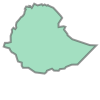

In [5]:
from shapely.geometry import MultiPolygon, Polygon # manipulation and analysis of planar objects

footprint = None
for fp in eth['geometry']:
    footprint = fp
    
footprint

In [36]:
from collections import OrderedDict

ethTiles = ['36NWP','36NXP', '36NXN']
tiles = ['37PBM']
# keyworded arguments
query_kwargs = {
    'platformname': 'Sentinel-2',
#     'producttype': 'S2MSI2A',
    'processinglevel': 'Level-1C',
    'cloudcoverpercentage': (0, 10),
    'date': ('20191101', '20191103')
}

products = OrderedDict()

for tile in ethTiles:
    kw = query_kwargs.copy()
    kw['tileid'] = tile
    product = sentinelAPI.query(**kw)
    products.update(product)


1
1
1


In [37]:
#dict of all products available in date period with query specification
products_gdf = sentinelAPI.to_geodataframe(products).sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf

,title,link,link_alternative,link_icon,summary,datatakesensingstart,beginposition,endposition,ingestiondate,orbitnumber,...,s2datatakeid,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,identifier,level1cpdiidentifier,uuid,geometry
317df8c4-1249-4e04-9ce6-78f1ccb10efa,S2A_MSIL1C_20191101T080051_N0208_R035_T36NXP_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-01T08:00:51.024Z, Instrument: MS...",2019-11-01 08:00:51.024,2019-11-01 08:00:51.024,2019-11-01 08:00:51.024,2019-11-01 13:19:34.973,22769,...,GS2A_20191101T080051_022769_N02.08,S2MSI1C,2015-028A,DESCENDING,Sentinel-2A,Level-1C,S2A_MSIL1C_20191101T080051_N0208_R035_T36NXP_2...,S2A_OPER_MSI_L1C_TL_EPAE_20191101T093015_A0227...,317df8c4-1249-4e04-9ce6-78f1ccb10efa,"MULTIPOLYGON (((34.89974 7.14490, 34.90413 8.1..."
930d9cb0-f0d5-42da-a27f-59cf33cb7061,S2A_MSIL1C_20191101T080051_N0208_R035_T36NWP_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-01T08:00:51.024Z, Instrument: MS...",2019-11-01 08:00:51.024,2019-11-01 08:00:51.024,2019-11-01 08:00:51.024,2019-11-01 13:19:33.458,22769,...,GS2A_20191101T080051_022769_N02.08,S2MSI1C,2015-028A,DESCENDING,Sentinel-2A,Level-1C,S2A_MSIL1C_20191101T080051_N0208_R035_T36NWP_2...,S2A_OPER_MSI_L1C_TL_EPAE_20191101T093015_A0227...,930d9cb0-f0d5-42da-a27f-59cf33cb7061,"MULTIPOLYGON (((33.99419 7.14774, 33.99649 8.1..."
5bc8d9aa-30f3-475c-9ddd-aa7f8897b02f,S2A_MSIL1C_20191101T080051_N0208_R035_T36NXN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-01T08:00:51.024Z, Instrument: MS...",2019-11-01 08:00:51.024,2019-11-01 08:00:51.024,2019-11-01 08:00:51.024,2019-11-01 13:19:32.938,22769,...,GS2A_20191101T080051_022769_N02.08,S2MSI1C,2015-028A,DESCENDING,Sentinel-2A,Level-1C,S2A_MSIL1C_20191101T080051_N0208_R035_T36NXN_2...,S2A_OPER_MSI_L1C_TL_EPAE_20191101T093015_A0227...,5bc8d9aa-30f3-475c-9ddd-aa7f8897b02f,"MULTIPOLYGON (((34.89625 6.24115, 34.90011 7.2..."


In [71]:
type(products_gdf)
products_gdf['title']
pg = products_gdf
set(products_gdf)
products_gdf['uuid'][0]

'317df8c4-1249-4e04-9ce6-78f1ccb10efa'

In [80]:
for i in range(len(products_gdf)):
    print(products_gdf['uuid'][i])
    sentinelAPI.download(products_gdf['uuid'][i])

317df8c4-1249-4e04-9ce6-78f1ccb10efa


Downloading: 100%|██████████| 799M/799M [09:15<00:00, 1.44MB/s]  
MD5 checksumming: 100%|██████████| 799M/799M [00:01<00:00, 576MB/s] 


930d9cb0-f0d5-42da-a27f-59cf33cb7061


Downloading: 100%|██████████| 769M/769M [43:36<00:00, 294kB/s]    
MD5 checksumming: 100%|██████████| 769M/769M [00:01<00:00, 617MB/s] 


5bc8d9aa-30f3-475c-9ddd-aa7f8897b02f


Downloading:  50%|█████     | 401M/796M [15:26<15:14, 432kB/s]    


KeyboardInterrupt: 

In [91]:
'''
36nwp 36nxp
      36nxn
'''
import rasterio as rio
from rasterio.plot import show

### NDVI 36NWP

In [84]:
R10_36NWP = '/home/am/travail/agri/Research/tools/stitch/S2A_MSIL1C_20191101T080051_N0208_R035_T36NWP_20191101T093015.SAFE/GRANULE/L1C_T36NWP_A022769_20191101T080824/IMG_DATA'
red36NWP = rio.open(R10_36NWP+'/T36NWP_20191101T080051_B04.jp2') # red data b04
nir36NWP = rio.open(R10_36NWP+'/T36NWP_20191101T080051_B08.jp2') # near infrared data b08

red36NWPRead = red36NWP.read()
nir36NWPRead = nir36NWP.read()
ndvi36NWP = ( nir36NWPRead.astype(float) - red36NWPRead.astype(float) ) / (nir36NWPRead + red36NWPRead)


In [89]:
meta = red36NWP.meta
meta.update(driver = 'GTiff')
meta.update(dtype = rio.float32)

with rio.open('stitch/36NWP_NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi36NWP.astype(rio.float32))

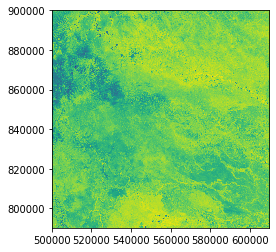

In [93]:
ndvi_36NWP = rio.open('stitch/36NWP_NDVI.tif')
show(ndvi_36NWP)

### NDVI 36NXP

In [94]:
R10_36NXP = '/home/am/travail/agri/Research/tools/stitch/S2A_MSIL1C_20191101T080051_N0208_R035_T36NXP_20191101T093015.SAFE/GRANULE/L1C_T36NXP_A022769_20191101T080824/IMG_DATA'
red36NXP = rio.open(R10_36NXP+'/T36NXP_20191101T080051_B04.jp2') # red data b04
nir36NXP = rio.open(R10_36NXP+'/T36NXP_20191101T080051_B08.jp2') # near infrared data b08

red36NXPRead = red36NXP.read()
nir36NXPRead = nir36NXP.read()
ndvi36NXP = ( nir36NXPRead.astype(float) - red36NXPRead.astype(float) ) / (nir36NXPRead + red36NXPRead)

In [96]:
meta = red36NXP.meta
meta.update(driver = 'GTiff')
meta.update(dtype = rio.float32)

with rio.open('stitch/36NXP_NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi36NXP.astype(rio.float32))

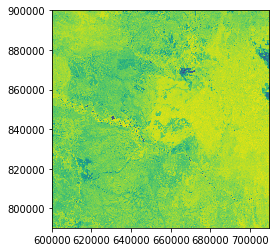

In [97]:
ndvi_36NXP = rio.open('stitch/36NXP_NDVI.tif')
show(ndvi_36NXP)

### NDVI 36NXN

### Stitching with Mosaic

In [99]:
# Merge function returns a single mosaic array and the transformation info
from rasterio.merge import merge

mosaic_files = []
mosaic_files.append(ndvi_36NWP)
mosaic_files.append(ndvi_36NXP)
mosaic, out_trans = merge(mosaic_files)

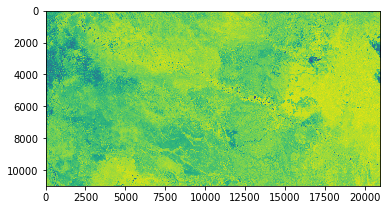

In [101]:
show(mosaic)